In [1]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# Provide image size
IMAGE_SIZE = [224, 224]

# Give our training and testing path
training_data = r'/Users/aruni/VScode_Workspace/project/breast_xray/train'
testing_data = r'/Users/aruni/VScode_Workspace/project/breast_xray/test'

# Find how many classes are present in the train dataset
folders = glob(r'/Users/aruni/VScode_Workspace/project/breast_xray/train/*')

# Logistic Regression Model
input_shape = IMAGE_SIZE + [3]
model = tf.keras.Sequential([
    Flatten(input_shape=input_shape),
    Dense(len(folders), activation='softmax')  # Output layer with softmax for multiclass classification
])




In [2]:
# View the structure of the model
model.summary()

# Compiling our model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# ImageDataGenerators
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Set up the data generators
training_set = train_datagen.flow_from_directory(training_data,
                                                 target_size = IMAGE_SIZE,
                                                 batch_size = 10,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(testing_data,
                                            target_size = IMAGE_SIZE,
                                            batch_size = 10,
                                            class_mode = 'categorical')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 2)                 301058    
                                                                 
Total params: 301058 (1.15 MB)
Trainable params: 301058 (1.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Found 497 images belonging to 2 classes.
Found 491 images belonging to 2 classes.


In [3]:
# Fitting the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5, # Change the number of epochs if needed
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

# Save the model
#model.save('logistic_regression_model.h5')

Epoch 1/5
50/50 [==============================] - 11s 216ms/step - loss: 6.0210 - accuracy: 0.8229 - val_loss: 1.9107 - val_accuracy: 0.8452
Epoch 2/5
50/50 [==============================] - 10s 210ms/step - loss: 2.7990 - accuracy: 0.8008 - val_loss: 3.6345 - val_accuracy: 0.8758
Epoch 3/5
50/50 [==============================] - 10s 209ms/step - loss: 4.3576 - accuracy: 0.7767 - val_loss: 6.2391 - val_accuracy: 0.3462
Epoch 4/5
50/50 [==============================] - 10s 211ms/step - loss: 5.5014 - accuracy: 0.7324 - val_loss: 1.2695 - val_accuracy: 0.7067
Epoch 5/5
50/50 [==============================] - 11s 220ms/step - loss: 3.0000 - accuracy: 0.7364 - val_loss: 7.8919 - val_accuracy: 0.3870


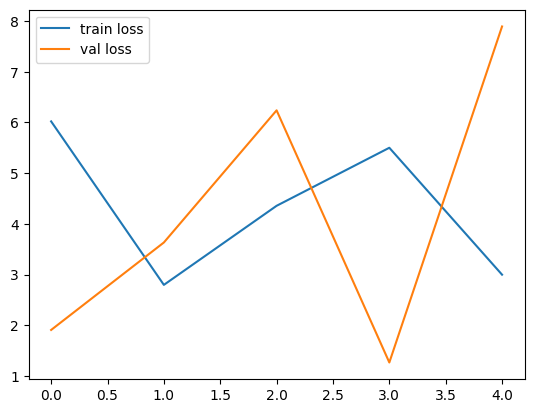

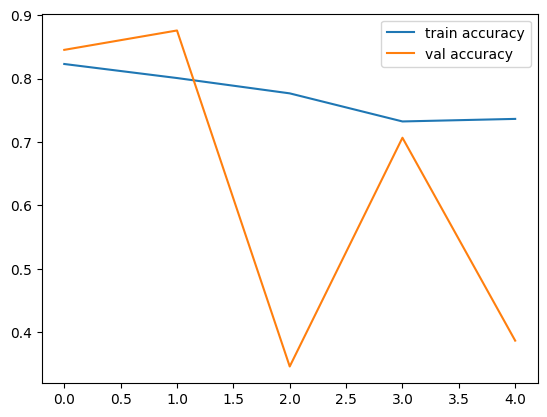

In [4]:
# Plotting training history
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()

50/50 [==============================] - 4s 76ms/step
Confusion matrix, without normalization


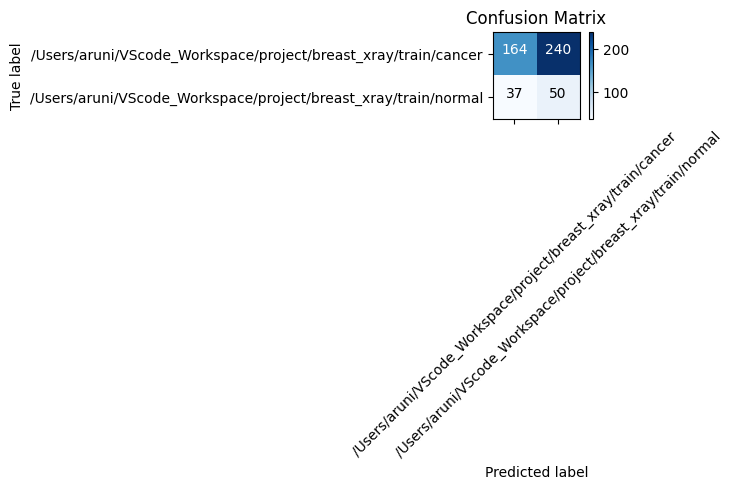

In [5]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Predicting the test set results
Y_pred = model.predict(test_set)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(test_set.classes, y_pred)
plot_confusion_matrix(cm, classes = folders, title = 'Confusion Matrix')
